In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Replacing blanks with 0 as tenure is 0 and no total charges are recorded**

In [12]:
df['TotalCharges'] = df['TotalCharges'].replace(' ','0')
df['TotalCharges'] = df['TotalCharges'].astype('float')
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [14]:
df.isnull().sum().sum()  #check that there is no overall null value is present

0

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df.duplicated().sum()

0

In [17]:
 df['customerID'].duplicated().sum()

0

In [18]:
def conv(value):                     
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

 **Converted 0 & 1 values of SeniorCitizen to yes/no to make it easier understand**

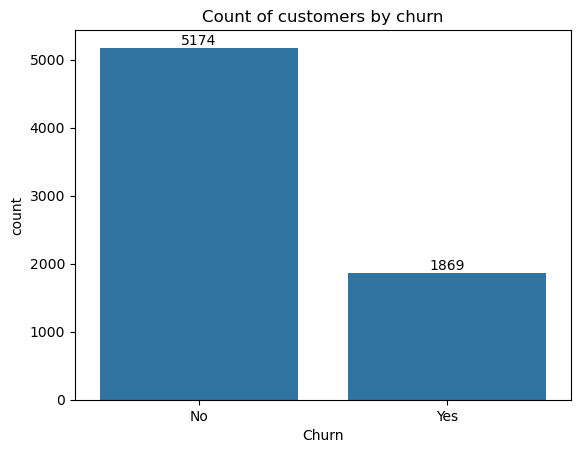

In [26]:
a = sns.countplot(x = 'Churn', data = df)
a.bar_label(a.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

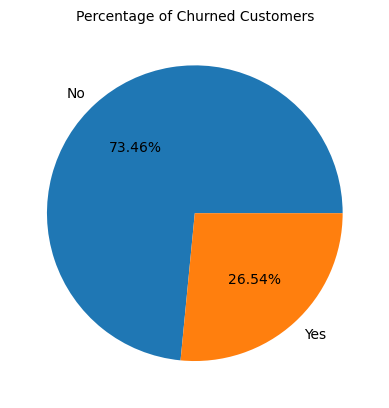

<Figure size 300x400 with 0 Axes>

In [27]:
g = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(g['Churn'], labels = g.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.figure(figsize = (3,4))
plt.show()


#From the given pie chart we can conclude that 26.54% of our customers have churned out.
#Now let's explore the reason behind it

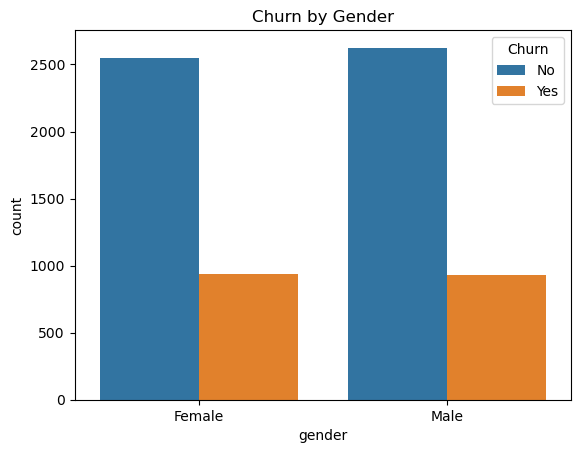

<Figure size 300x300 with 0 Axes>

In [89]:
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.title("Churn by Gender")
plt.figure(figsize = (3,3))
plt.show()

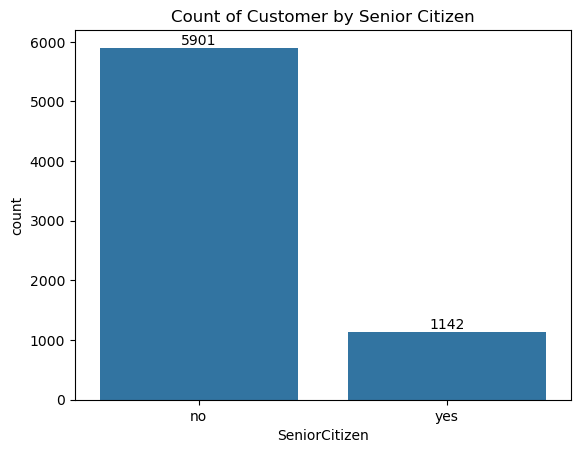

<Figure size 300x300 with 0 Axes>

In [41]:
a = sns.countplot(x = 'SeniorCitizen', data = df,)
a.bar_label(a.containers[0])
plt.title("Count of Customer by Senior Citizen")
plt.figure(figsize = (3,3))
plt.show()

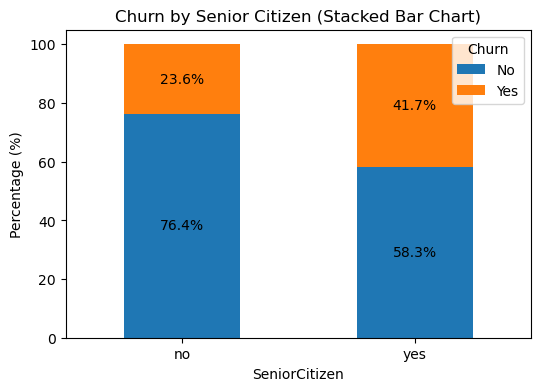

In [91]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack() * 100
#Plot
fig, ax = plt.subplots(figsize=(6,4)) # Adjust figsize for better visualization
#Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e']) # Customize colors if desired
#Add percentage Labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')
plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc= 'upper right') #Customize Legend Location
plt.show()

**Comparative a greated % of people in SeniorCitizen category have churned**

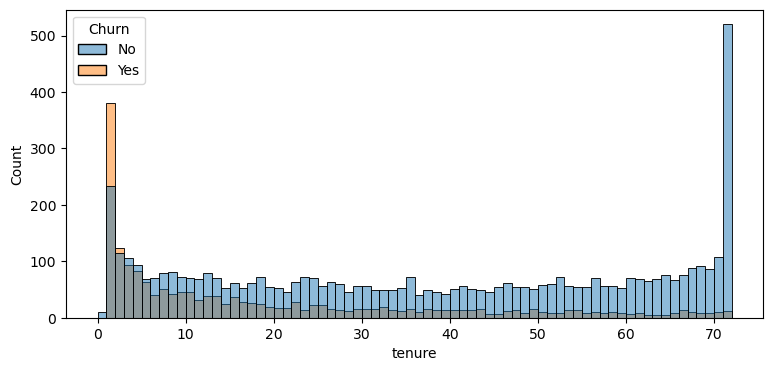

In [72]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

**People who have used our services for a long time have stayed and peolpe who used  our services for 1 or 2 months have churned**

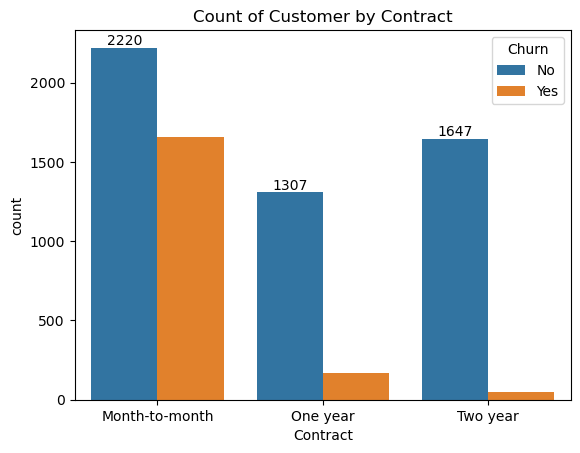

<Figure size 300x300 with 0 Axes>

In [73]:
a = sns.countplot(x = 'Contract', data = df, hue = "Churn")
a.bar_label(a.containers[0])
plt.title("Count of Customer by Contract")
plt.figure(figsize = (3,3))
plt.show()

*People who jave month to month contract are likely to churn then from those who have 1or 2 years or contract*

In [75]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

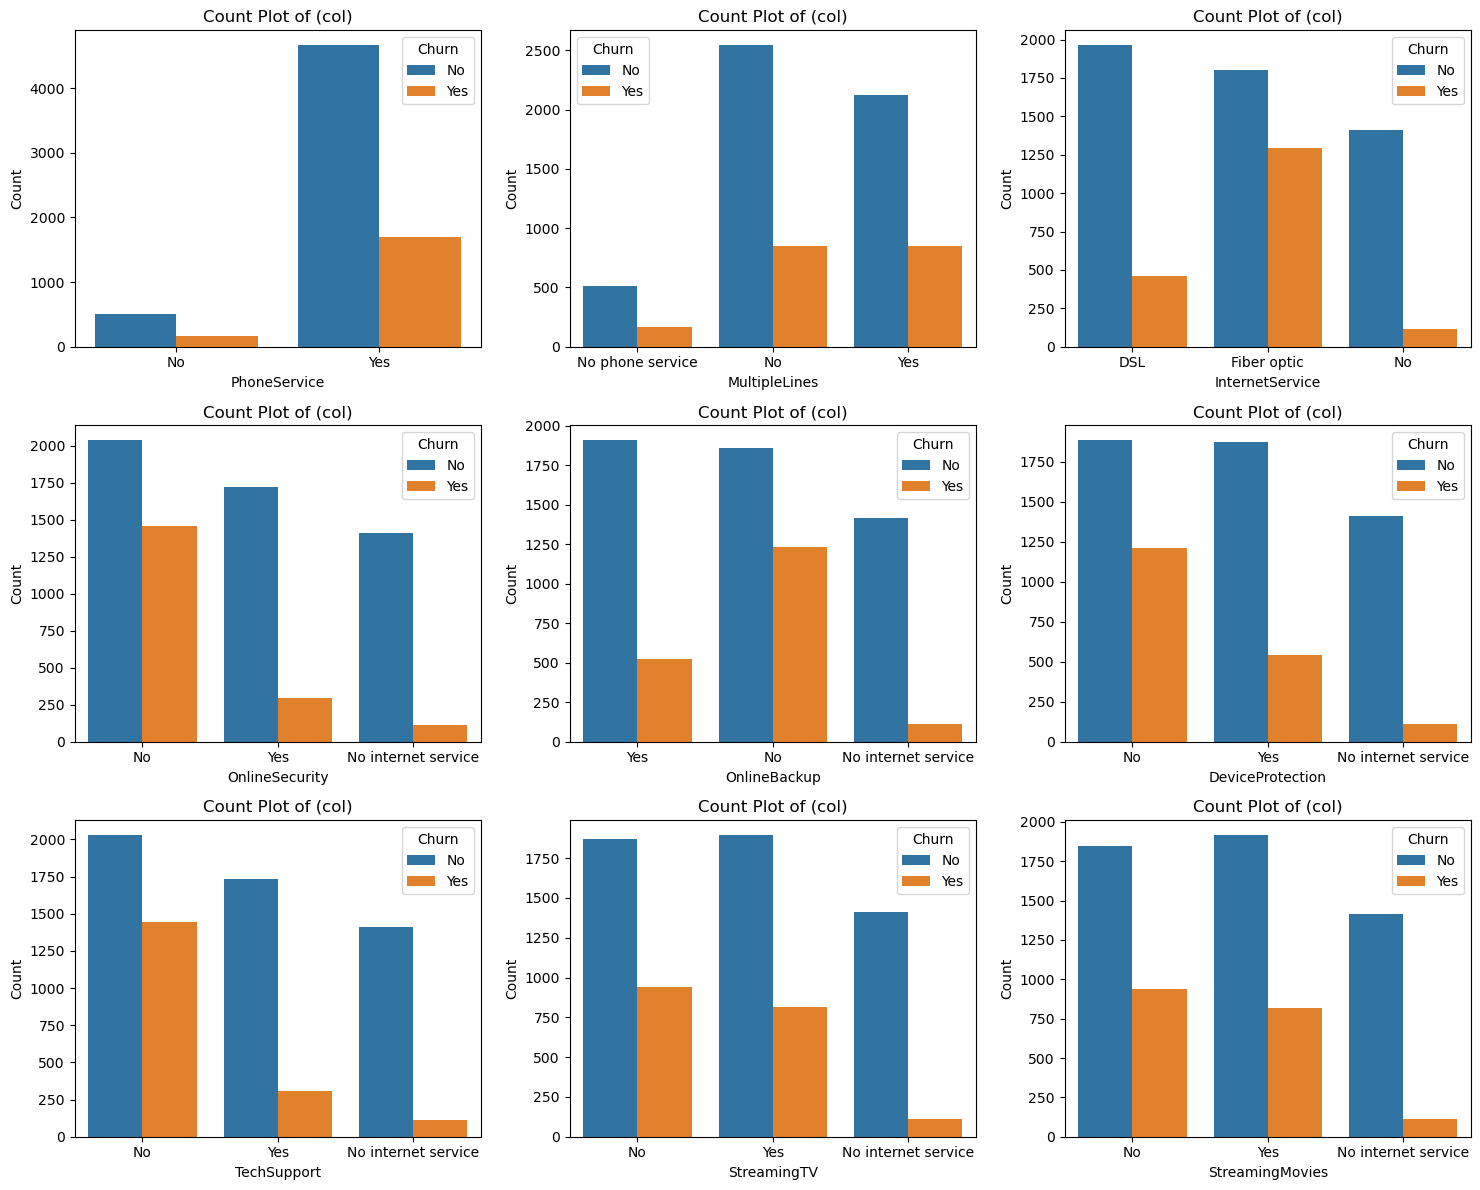

In [82]:
#List of columns for which we want to create count plots
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
#Number of columns for the subplot grid (you can change this)
n_cols= 3
n_rows = (len(columns) + n_cols - 1) // n_cols #Calculate number of rows needed
#Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  #Adjust figsize as needed

#Flatten the axes array for easy iteration (handles both 10 and 20 arrays) 
axes = axes.flatten()
#Iterate over columns and plot count plots
for i, col in enumerate (columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df ["Churn"]) 
    axes[i].set_title(f'Count Plot of (col)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
#Remove empty subplots (if any) 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

*The majority of customers do not churn tend to have services like PhoneService(particularly DSL) and OnlineSecurity enabled. For services like OnlineBackup, TeachSupport and SreamingTV, Churn rates are noticeably higher when these services are not used or are unavailable.*

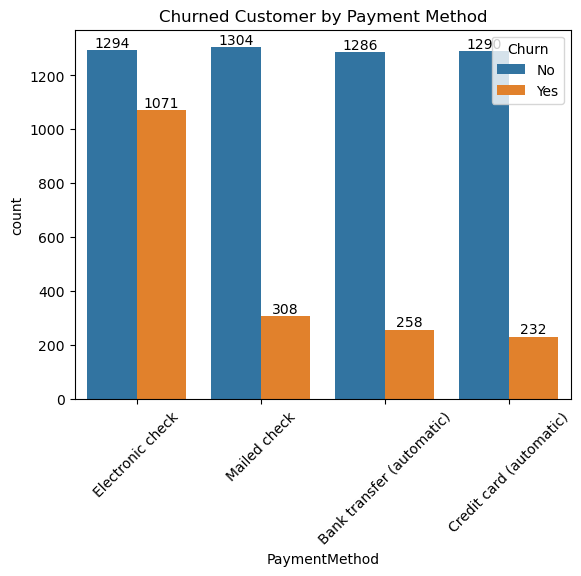

<Figure size 600x400 with 0 Axes>

In [88]:
a = sns.countplot(x = 'PaymentMethod', data = df, hue = "Churn")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.xticks(rotation = 45)
plt.title("Churned Customer by Payment Method")
plt.figure(figsize = (6,4))

plt.show()

**Customer is likely to Churn when he is using electronic check as a payment method.**